### Kaggle Link: [Click here](https://www.kaggle.com/code/nyinyeinaung/predicting-product-prices-using-deep-learning)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Read the dataset
df = pd.read_csv('/kaggle/input/supply-chain-analysis/supply_chain_data.csv')

#view the first 5 rows of the dataset, can specify amount in the parentheses
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
#view the info of the Columns of the dataset such as data type and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
#checking if there are any null values in the dataset.
#isnull function checks if the each row in each column is null and the sum function sums up the amount
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [5]:
#check if there are any duplicated rows of data
df.duplicated().sum()

0

**EDA**

Text(0.5, 1.0, 'Product Type')

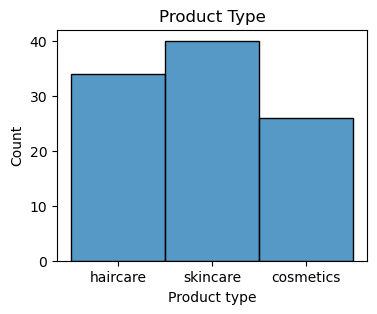

In [6]:
#plotting to see the distrubution of product types
fig = plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Product type')
plt.title('Product Type')

<Axes: xlabel='Price', ylabel='Count'>

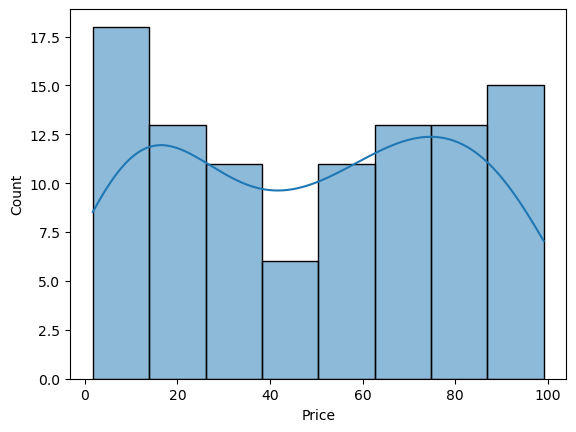

In [7]:
#viewing the histogram of the price column
sns.histplot(data=df,x='Price',kde=True)

<Axes: xlabel='Price', ylabel='Number of products sold'>

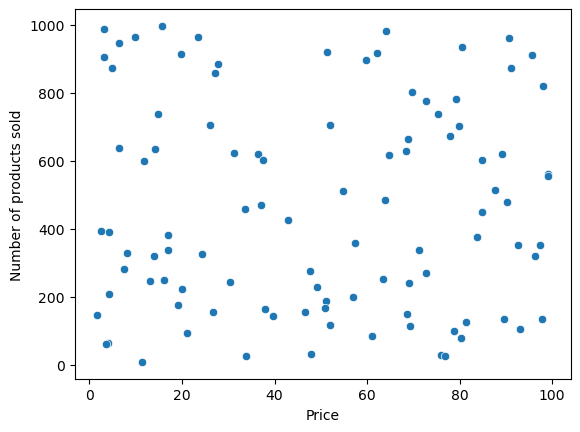

In [8]:
#making a scatter plot of the price and the number of products sold to see if there is a correlation
sns.scatterplot(data=df,x='Price',y='Number of products sold')

In [9]:
#checking the descriptive statistics of the product type based on the price
df.groupby('Product type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Product type,,,,,,,,
cosmetics,26.0,57.361058,30.423912,2.397275,44.147347,64.311917,80.821379,97.760086
haircare,34.0,46.014279,28.850845,1.699976,26.796123,48.588874,69.678712,97.446947
skincare,40.0,47.259329,33.337844,4.078333,17.033205,37.228419,82.344926,99.171329


<Axes: xlabel='Price', ylabel='Product type'>

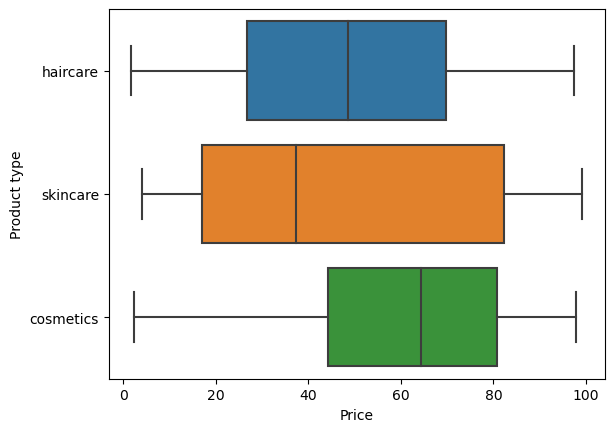

In [10]:
#boxplot of the price and the product type
sns.boxplot(data=df,x='Price',y='Product type')

<Axes: xlabel='Customer demographics', ylabel='Count'>

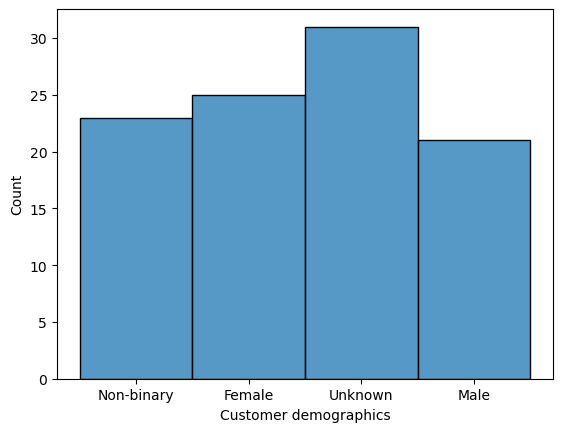

In [11]:
#making histogram of the Customer Demographics to get a representation
sns.histplot(data=df,x='Customer demographics')

<Axes: xlabel='Location', ylabel='Count'>

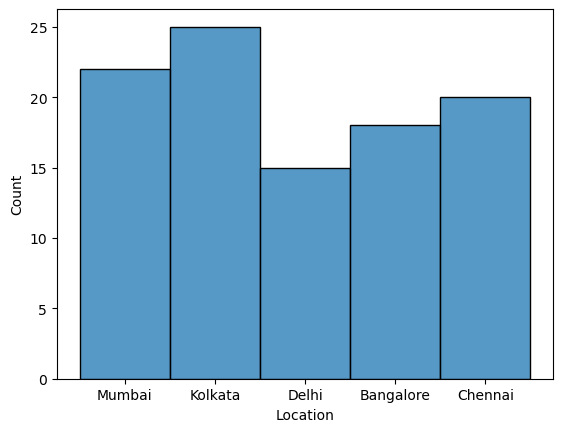

In [12]:
#making histogram of the location of stores
sns.histplot(data=df,x='Location')

Text(0.5, 1.0, 'Price of product type in Locations')

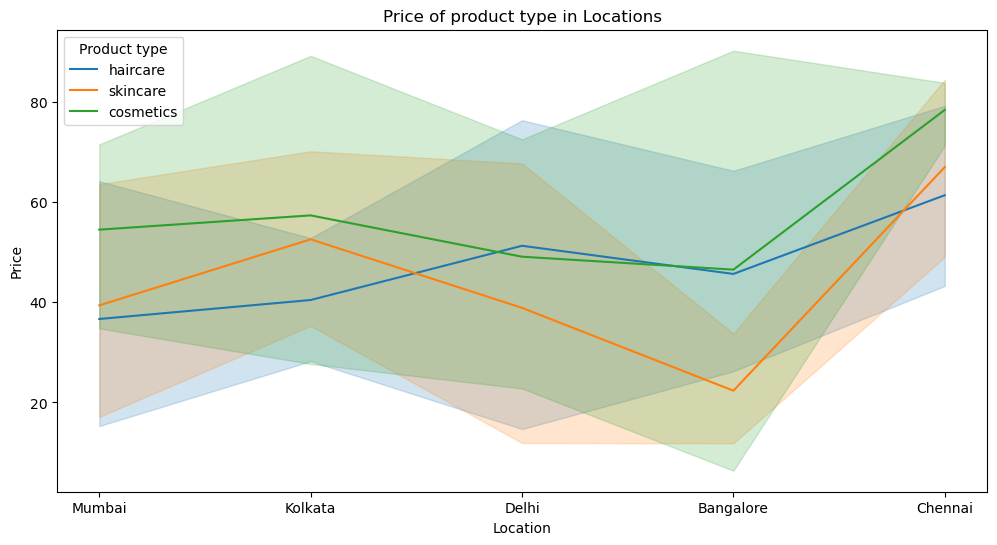

In [13]:
#making a lineplot of the price of each product type at each store location
plt.figure(figsize=(12,6))
sns.lineplot(data=df,y='Price',x='Location',hue='Product type')
plt.title('Price of product type in Locations')

In [14]:
#viewing the data again
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [15]:
#checking the data types of the columns
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [16]:
#drop the 'SKU' column because it's an id column and isn't useful
df=df.drop('SKU',axis=1)

In [17]:
#make a label encoder
lb = LabelEncoder()

#add the names of columns that have the object data type into an list '[]'
columns = ['Product type','Customer demographics','Shipping carriers','Supplier name','Location','Inspection results','Transportation modes','Routes']

#apply the label encoding to every column of the dataset with the names contained in the list
for c in columns:
  df[c]=lb.fit_transform(df[c])

#check to see if the label encoding is applied successifully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int64  
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    int64  
 6   Stock levels             100 non-null    int64  
 7   Lead times               100 non-null    int64  
 8   Order quantities         100 non-null    int64  
 9   Shipping times           100 non-null    int64  
 10  Shipping carriers        100 non-null    int64  
 11  Shipping costs           100 non-null    float64
 12  Supplier name            100 non-null    int64  
 13  Location                 100 non-null    int64  
 14  Lead time                10

<Axes: >

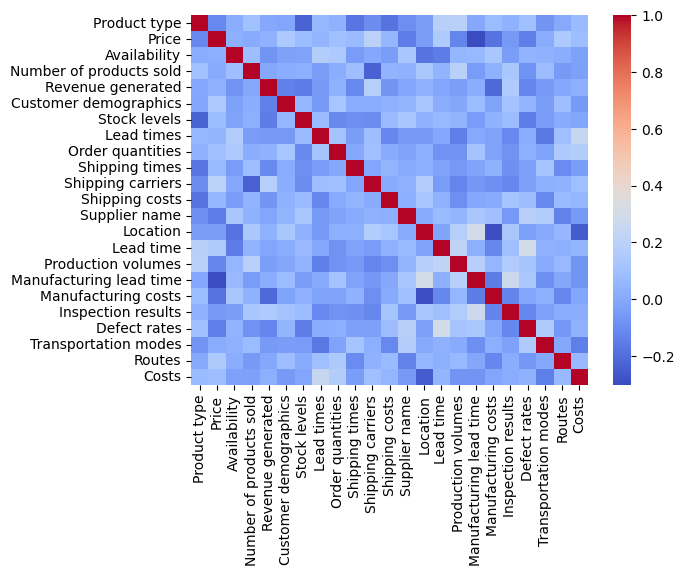

In [18]:
#Create a correlation heatmap
sns.heatmap(df.corr(),cmap='coolwarm')

Text(0.5, 1.0, "The features' correlation to Price ")

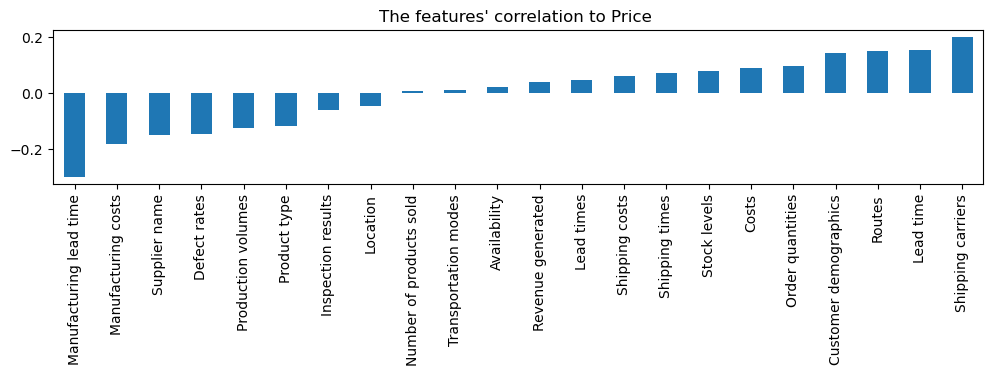

In [19]:
#create a barplot for the features' correlation to the Price column
fig  = plt.figure(figsize=(12,2))
df.corr()['Price'].sort_values()[:-1].plot(kind='bar')
plt.title('The features\' correlation to Price ')

**Scaling and Train Test Split**

In [20]:
#Separate the Class column 'Price' and the rest of the Dataset
#extracting the values of the dataset using .values to make sure only numeric data is extracted
X=df.drop('Price',axis=1).values
y=df['Price'].values

#split the data into training and testing set with ratio of 80:20
#set the random_state=101 to get the same result as the example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
#create an instance of MinMaxScaler and applying it to the X_train and X_test and save it under different name
#This will create a normalized version of the data; the two deep learning model with & without normalization will be compared later
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [22]:
#check the shape of the input dataset to see how many neurons are needed in the first layer
print('X_train shape: ',X_train.shape)
print('X test shape: ',X_test.shape)

X_train shape:  (80, 22)
X test shape:  (20, 22)


**Model Creation**

In [23]:
#creating a deep learning model
model = Sequential()

#the first layer must match the number of features from the input
model.add(Dense(22,activation='relu'))

#the "hidden" layer can contain any number of neurons and layers
#can adjust the amounts accordingly but make sure to avoid overfitting
#overfitting is training the model perfectly perdict the training dataset but is useless with other unseen data
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))

#for binary classification or in this case regression, the last layer will have one neuron
model.add(Dense(1))

#compile the model - adam optimizer is used, the metrics to keep track is Mean absolute error and the loss metrics is the mean squared error
#for more information about optimizers, metrics and losses, visit the following links:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [24]:
#fit the model with unnormalized data and save the model as 'unNormModel'
# batchsize of 128, 400 epoches and add the testing data as the validation data
unNormModel = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 1778397.6250 - mae: 1247.0095 - val_loss: 1567447.2500 - val_mae: 1209.2607
Epoch 2/400
1/1 [==============================] - 0s 33ms/step - loss: 1509468.0000 - mae: 1150.4573 - val_loss: 1305862.0000 - val_mae: 1104.6633
Epoch 3/400
1/1 [==============================] - 0s 32ms/step - loss: 1266053.7500 - mae: 1055.2335 - val_loss: 1076178.3750 - val_mae: 1003.5208
Epoch 4/400
1/1 [==============================] - 0s 34ms/step - loss: 1050322.0000 - mae: 962.4879 - val_loss: 872846.1875 - val_mae: 904.6426
Epoch 5/400
1/1 [==============================] - 0s 35ms/step - loss: 860344.6250 - mae: 872.2211 - val_loss: 694487.2500 - val_mae: 807.6913
Epoch 6/400
1/1 [==============================] - 0s 32ms/step - loss: 692798.1250 - mae: 783.6974 - val_loss: 540131.3125 - val_mae: 712.7111
Epoch 7/400
1/1 [==============================] - 0s 34ms/step - loss: 547044.0000 - mae: 697.2309 - val_loss: 409132.5000 -

<Axes: >

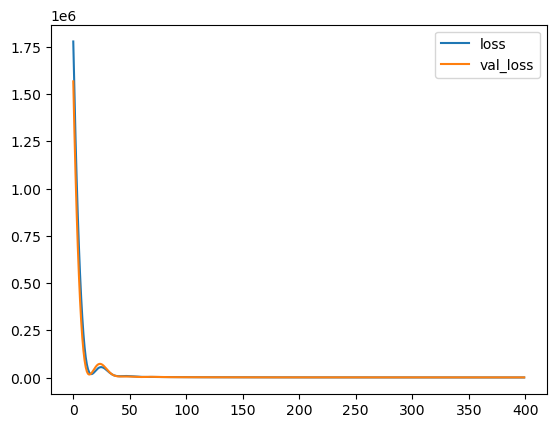

In [25]:
#The validation loss and the actual loss are practically the same as seen in the graph
#shows the deep learning model doesn't have a overfitting problem and should work well with unseen data
losses = {'loss':unNormModel.model.history.history['loss'],'val_loss':unNormModel.model.history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()

<Axes: >

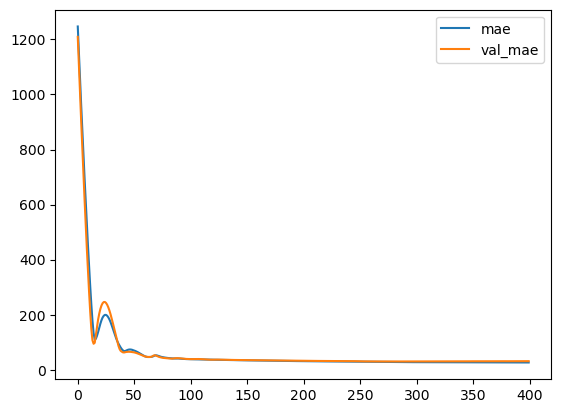

In [26]:
#plot how the model improved its Mean Absolute Error during the model fitting
mae = {'mae':unNormModel.model.history.history['mae'],'val_mae':unNormModel.model.history.history['val_mae']}
mae = pd.DataFrame(mae)
mae.plot()

In [27]:
#Predict the prices using the model
yPreds = model.predict(X_test)

#output the evalation metrics using the predicted price and the actual price(ytest)
# mean absolute error,  mean squared error, root mean squared error and r2 square
print('Evauation metrics of model with unnormalized data ')
print('MAE: %.03f'%mean_absolute_error(y_test,yPreds))
print('MSE: %.03f'%mean_squared_error(y_test,yPreds))
print('RMSE: %.03f'%np.sqrt(mean_squared_error(y_test,yPreds)))
print('R2 score: %.03f'%explained_variance_score(y_test,yPreds))

1/1 [==============================] - 0s 112ms/step
Evauation metrics of model with unnormalized data 
MAE: 31.184
MSE: 1371.414
RMSE: 37.033
R2 score: -0.301


In [28]:
##define a new model again with the same specs as before
model = Sequential()

model.add(Dense(22,activation='relu'))

model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#fit the new model with normalized training and testing data and save the model as 'normModel'
normModel = model.fit(x=X_train_norm,y=y_train,
          validation_data=(X_test_norm,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 3514.2649 - mae: 50.8625 - val_loss: 2940.9146 - val_mae: 43.4528
Epoch 2/400
1/1 [==============================] - 0s 33ms/step - loss: 3511.1562 - mae: 50.8319 - val_loss: 2938.4724 - val_mae: 43.4245
Epoch 3/400
1/1 [==============================] - 0s 33ms/step - loss: 3508.0103 - mae: 50.8009 - val_loss: 2935.9922 - val_mae: 43.3950
Epoch 4/400
1/1 [==============================] - 0s 36ms/step - loss: 3504.8013 - mae: 50.7693 - val_loss: 2933.5039 - val_mae: 43.3650
Epoch 5/400
1/1 [==============================] - 0s 33ms/step - loss: 3501.5532 - mae: 50.7378 - val_loss: 2930.9524 - val_mae: 43.3347
Epoch 6/400
1/1 [==============================] - 0s 35ms/step - loss: 3498.2234 - mae: 50.7053 - val_loss: 2928.2173 - val_mae: 43.3028
Epoch 7/400
1/1 [==============================] - 0s 35ms/step - loss: 3494.8452 - mae: 50.6722 - val_loss: 2925.3521 - val_mae: 43.2697
Epoch 8/400
1/1 [===================

<Axes: >

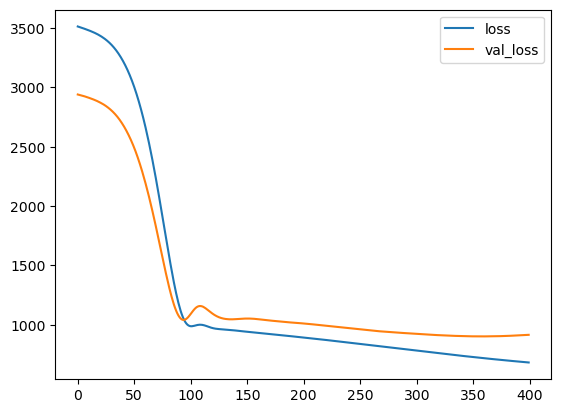

In [29]:
#The validation loss and the actual loss are practically the same as seen in the graph
#shows the deep learning model doesn't have a overfitting problem and should work well with unseen data
losses = {'loss':normModel.model.history.history['loss'],'val_loss':normModel.model.history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()

<Axes: >

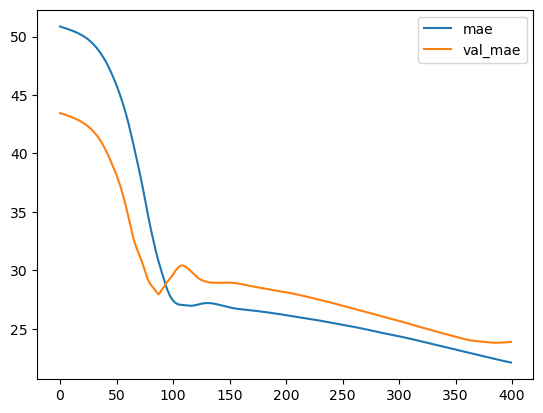

In [30]:
#plot how the model improved its Mean Absolute Error during the model fitting
mae = {'mae':normModel.model.history.history['mae'],'val_mae':normModel.model.history.history['val_mae']}
mae = pd.DataFrame(mae)
mae.plot()

In [31]:
#predict the prices again using the new model
yNormPreds = model.predict(X_test_norm)

#evaluation metrics for the new model
print('Evaluation metrics of model with normalized data')
print('MAE: %.03f'%mean_absolute_error(y_test,yNormPreds))
print('MSE: %.03f'%mean_squared_error(y_test,yNormPreds))
print('RMSE: %.03f'%np.sqrt(mean_squared_error(y_test,yNormPreds)))
print('R2 score: %.03f'%explained_variance_score(y_test,yNormPreds))

1/1 [==============================] - 0s 65ms/step
Evaluation metrics of model with normalized data
MAE: 23.885
MSE: 914.956
RMSE: 30.248
R2 score: 0.134


Text(0, 0.5, 'Predicted price')

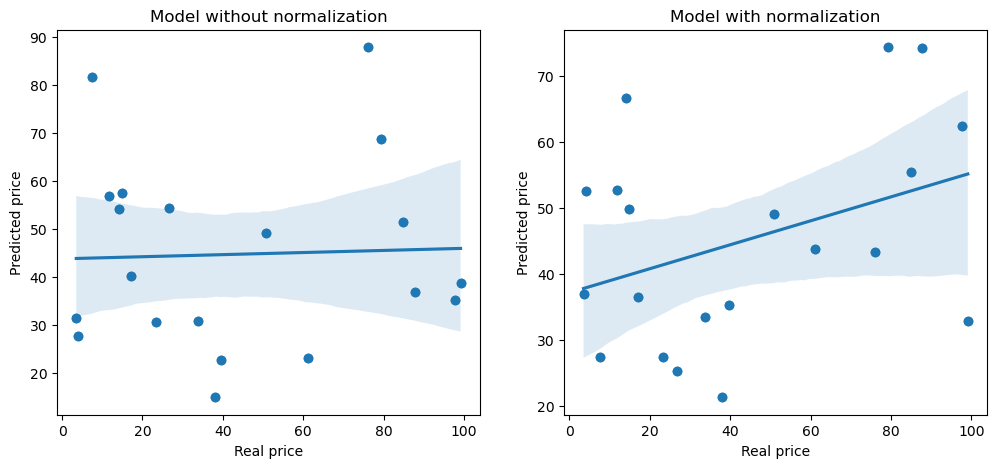

In [32]:
#make scatter plots of the predicted price and the actual price for both models
#make a regplot to see the linear regression model fit (just for visualization)
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test,yPreds)
plt.title('Model without normalization')
sns.regplot(x=y_test,y=yPreds)
plt.xlabel('Real price')
plt.ylabel('Predicted price')

plt.subplot(1,2,2)
plt.scatter(y_test,yNormPreds)
sns.regplot(x=y_test,y=yNormPreds)
plt.title('Model with normalization')
plt.xlabel('Real price')
plt.ylabel('Predicted price')



**Conclusion**

Model with Normalized data performed better than the model with unnormalized data. It was able to explain 12% of the predictions with an R2-score of 0.129 but the other model had a R2 score which meant it couldn't explain any of its predictions.


> Model with normalization

* MAE: 26.290
* MSE: 940.151
* RMSE: 30.662
* R2 score: 0.129


> Model without Normalization

* MAE: 34.008
* MSE: 1482.000
* RMSE: 38.497
* R2 score: -0.397

The model with normalization had a better linear regression model fit which shows better correlation between predicted prices and actual prices